# СБОРНЫЙ ПРОЕКТ 1    
# Выявление факторов, определяющих успешность компьютерных игр

<br/>
    
<div class="alert alert-info">
<h2> Привет!<a class="tocSkip"></h2>
<hr>  
Я - Сергей. Рад что ты читаешь это текст :) Сделаю пару ремарок общего характера. В описании выполняемых действий, комментариях, я использую местоимение 'мы', так как считаю что ты, читая код, становиться моим соучастником ('соучавствующие программирование') и мы вместе проходим по пути исследования. Да и сформировлась привычка так писать в ходе написания научных работ.   
NB! - так помечаю важные на мой взгдял идеи, которые стоит взять на заметку; инсайты, проработка которых требует большего знания предметной области.   
Надеюсь мои многословные комментарии тебя не утомят.    
</div>
    
<br/>

# Оглавление

[0. Описание проекта](#description)   
[1. Загрузка и изучение данных](#exploration)   
[2. Предобработка данных](#preparing)   
[2.1. Замена названий столбцов (приведение к нижнему реестру)](#rename)   
[2.2. Проверка дубликатов строк и уникальных значений колонок](#duplicates)   
[2.3. Обработка пропусков и изменение типов данных](#change)   
[2.4. Подсчёт суммарных продаж](#sum)   
[3. Исследовательский анализ данных](#analysis)   
[3.1. Выпуск игр по годам](#year)   
[3.2. Продажи игр по платформам](#platform)   
[3.3. 'Время жизни' платформ](#lifetime)   
[3.4. Определение потенциально прибыльных платформ](#relevant)   
[3.5. Диаграмма размаха по глобальным продажам игр в разбивке по платформам](#сhart)   
[3.6. Расчёт корреляции между отзывами и продажами](#corr)  
[3.7. Распределение игр по жанрам](#genre)   
[4. Портрет пользователя](#users)   
[4.1. Топ-5 платформ](#top_platform)   
[4.2. Топ-5 жанров](#top_genre)  
[4.3. Влияние рейтинга ESRB на продажи в регионах](#esrb)    
[5. Проверка гипотез](#hypothesis_testing)   
[5.1. Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#hypothesis_1)   
[5.2. Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные](#hypothesis_2)    
[6. Общий вывод](#summary)

# 0. Описание проекта <a id="description"></a>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы (например,
Xboxили PlayStation). Вам нужно выявить определяющие успешность игры
закономерности. Это позволит сделать ставку на потенциально популярный продукт и
спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й
— по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board)
— это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB
оценивает игровой контент и присваивает ему подходящую возрастную категорию,
например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### **Описание данных** 
* Name — название игры   
* Platform — платформа   
* Year_of_Release — год выпуска   
* Genre — жанр игры   
* NA_sales — продажи в Северной Америке (миллионы проданных копий)    
* EU_sales — продажи в Европе (миллионы проданных копий)   
* JP_sales — продажи в Японии (миллионы проданных копий)   
* Other_sales — продажи в других странах (миллионы проданных копий)   
* Critic_Score — оценка критиков (максимум 100)   
* User_Score — оценка пользователей (максимум 10)   
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.    

**NB!** Данные за 2016 год могут быть неполными.

---

## 1. Загрузка и изучение данных <a id="exploration"></a> 

In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st

In [2]:
#Прочитаем файл с гугл диска
from io import BytesIO
import requests
spreadsheet_id = '1OSfTPS5v8xqMuTjXGv2P9FkZjQxtq3NsckGa6OCpAqo'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data = pd.read_csv(BytesIO(r.content))
pd.set_option('display.max_columns', 20) 
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В датасете 16715 строк (наблюдений) и 11 колонок

In [3]:
# Посмотрим описание датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Выводы:**   
1. Имена всех колонок необходимо привести к нижнему реестру;   
1. Пропушенные значений есть в колонках Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating;    
1. В колонках Year_of_Release, User_Score и Rating необходимо изменить тип данных: Year_of_Release на int (год без даты нет смысла менять на временной тип ), User_Score и Rating - на float.   
   
Обработку пропусков  и изнемение типов данных мы совместим.   

---

## 2. Предобработка данных <a id="preparing"></a>

### 2.1. Замена названий столбцов (приведение к нижнему реестру) <a id="rename"></a>


In [4]:
data.columns = [x.lower() for x in data.columns]

### 2.2. Проверка дубликатов строк  и уникальных значений колонок <a id="duplicates"></a>

In [5]:
# Посчистаем число дубликатов срок
data.duplicated().sum()
# Дубликатов нет

0

In [6]:
# Посмотрим на список уникальных значений в каждой колонке.
# что бы не выводить каждую колонку в ручную, переберём их имена в цикле и выведем уникальные значения
# кроме колонок na_sales, eu_sales, jp_sales, other_sales - где большое количество уникальных значений
data_columns = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
for elem in data_columns:
    print('имя колонки', elem, 'значения', data[elem].unique())

имя колонки name значения ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
имя колонки platform значения ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
имя колонки year_of_release значения [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
имя колонки genre значения ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
имя колонки critic_score значения [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59

**NB!** В колонке user_score есть значение tbd - 'Подлежит определению', то есть на момент выгрузки базы значение было неизвестно. Обработаем его также как и пропуски.

### 2.3. Обработка пропусков и изменение типов данных <a id="change"></a>

In [7]:
# Подсчитаем число пропусков в каждой колонке
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### 2.3.1.  Колонки name и genre
В данных колонках по два пропуска, посмотрим на них.



In [8]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data[data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Вывод** В данных колонках пропуски в одних и техже строках. Пропуски заменить в данном случае нечем (невозможно), поэтому удалим строки, ориентируясь на пропуски в колонке name.

In [10]:
data = data.dropna(subset=['name'])

#### 2.3.2.  Колонка year_of_release    
Удалим пропущенные значений, та как 1. их доля не велика - 1,6% наблюдений; 2. Заменить пропуски нечем.    
Заменим тип на int.

In [11]:
# Удалим пропуски и изменим тип данных
data = data.dropna(subset=['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


#### 2.3.3.  Колонки critic_score, user_score и rating    
В колонках большое количество пропусков, но заменить их невозможно (т.к. не ясно чем, медиана, среднее не подойдут) и удалить тоже не возможно, т.к.потеряется большое число наблюдений - поэтому заменим их на значений отличне от данх в колонке. А в колонке user_score, как мы уже отметили есть значение tbd - 'Подлежит определению'. С колонки user_score  и начнём.

In [12]:
# Посчитаем число значений tbd в колонке user_score
data[data['user_score']=='tbd']['user_score'].count()
# значение встречается в 2376 наблюдениях

2376

In [13]:
# С помощью метода to_numeric приведем тип данных колонки user_score к числовому значению, а значения tbd заменим на nan
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [14]:
# NB! Пропуски в колонках critic_score и user_score заменим на -1 (числовое значение отличное от уже имеющихся в колонке), 
# чтобы в дальнейшем можно было проводить анализ
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)
# Тип данных в колонке critic_score приведм к цельночисленному,
# т.к. изучение уникальных значений показало что колонка содержит значений с нулями после точки
data['critic_score'] = data['critic_score'].astype('int')

In [15]:
# Пропуски в колонке rating заменим на 'неизвестен' - 'unknown'
data['rating'] = data['rating'].fillna('unknown')

In [16]:
# Проверим наличие пропусков
data.isnull().sum()


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Вывод** Пропущенных значений нет

### 2.4. Подсчёт суммарных продаж <a id="sum"></a>

In [17]:
# Создадим новую колонку total_sales в которую суммриуем продажи по регионам и выведем 5 строк обновлённого датасета на экран
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


---

## 3. Исследовательский анализ данных <a id="analysis"></a>   
**Задачи:**    
* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все
периоды?   
* Посмотрите, как менялись продажи по платформам. Выберите платформы с
наибольшими суммарными продажами и постройте распределение по годам. За
какой характерный срок появляются новые и исчезают старые платформы?   
* Возьмите данные за соответствующий актуальный период. Актуальный
период определите самостоятельно в результате исследования предыдущих
вопросов. Основной фактор — эти данные помогут построить прогноз на 2017
год.   
* Не учитывайте в работе данные за предыдущие годы.    
* Какие платформы лидируют по продажам, растут или падают? Выберите
несколько потенциально прибыльных платформ.   
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по
платформам. Опишите результат.   
* Посмотрите, как влияют на продажи внутри одной популярной платформы
отзывы пользователей и критиков. Постройте диаграмму рассеяния и
посчитайте корреляцию между отзывами и продажами. Сформулируйте
выводы.   
* Соотнесите выводы с продажами игр на других платформах.   
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о
самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими
продажами?   



In [18]:
# Посмотрим нет ли в колонках аномальных значений - сильно выбивающихся в низ или вверх
data.describe()
# -1 - это наша замена NaN

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,32.979871,2.688081,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,36.302947,4.170124,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


### 3.1. Выпуск игр по годам <a id="year"></a>

In [19]:
# Создадим соводную таблицу с числом игр, вышедших в каждом году
games_year_pivot = data.pivot_table(index='year_of_release', aggfunc={'name':'count'})
games_year_pivot.columns = ['count_of_games'] # Дадим колонке с числом игр имя
display(games_year_pivot)

,count_of_games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Распределение игр по годам


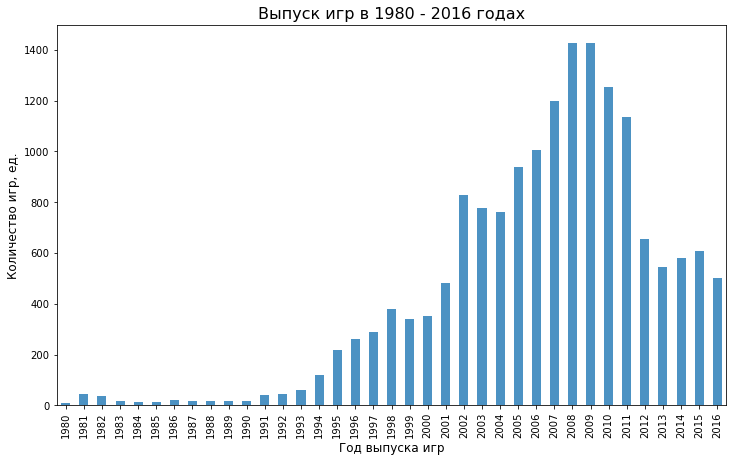

In [20]:
# Для нагладности визуализируем данные - построим график распределения количества выпущенных игр по годам
games_year_pivot.plot(y='count_of_games', kind='bar', figsize=(12, 7), legend=False, alpha=0.8)
plt.title(label='Выпуск игр в 1980 - 2016 годах', fontsize=16)
plt.xlabel('Год выпуска игр', fontsize=12)
plt.ylabel('Количество игр, ед.', fontsize=12)
print('Распределение игр по годам')

**Вывод** Выпуск игра резко пошел в верх в 1993 году (вышел первый Doom) и в 2008-2009 году достиг пика (годы финансового кризиса), после чего последовал спад выпуска игр длившийся до 2013 года (наверное последствия рецессии экономики США после 2008 года). Был спад выпуcка в 1999-2000 годах - возможно т.к. лопнул 'пузырь доткомов'. В последующие годы количество выпускаемых ежегодно игр так и не достигло пиковых значений.    
**NB!** Глядя на график можно выделить период можно выделить период последних 5 лет (2012 - 2016) - рынок игр пришёл к какому-то новому, относительно прежних лет, состоянию - почему не знаю, не эксперт в этой теме.

### 3.2. Продажи игр по платформам <a id="platform"></a>



In [21]:
# Посмтрим топ-10 палатформ по суммарному объму продаж игр
platform_pivot = (data.pivot_table(index=['platform'], aggfunc={'total_sales':sum}).nlargest(10, columns='total_sales'))
display((platform_pivot).reset_index())

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Продажи игр по платформам


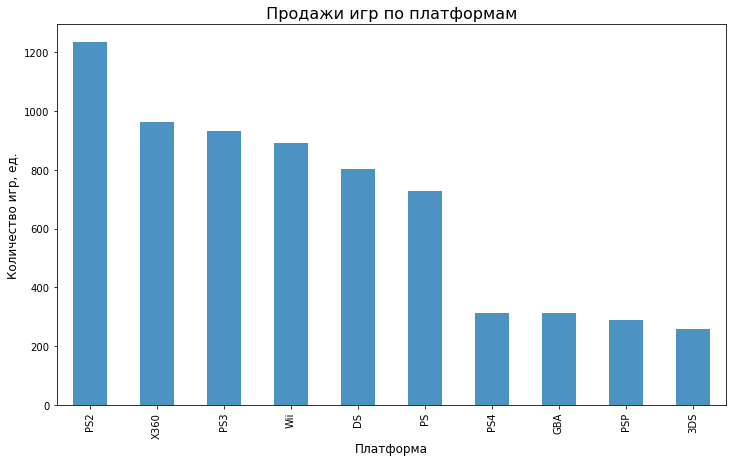

In [22]:
platform_pivot.plot(y='total_sales', kind='bar', figsize=(12, 7), legend=False, alpha=0.8)
plt.title(label=' Продажи игр по платформам ', fontsize=16)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Количество игр, ед.', fontsize=12)
print('Продажи игр по платформам')

In [23]:
top_10_platform = data.query('platform in @platform_pivot.index')
#top_10_platform 

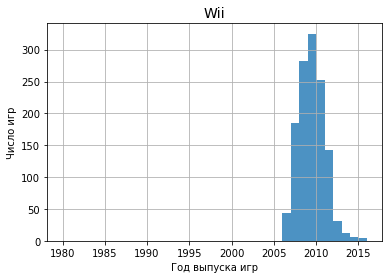

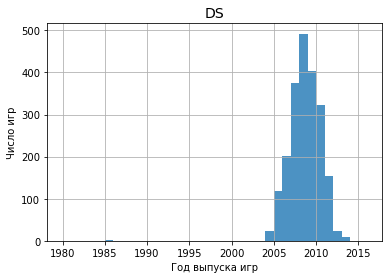

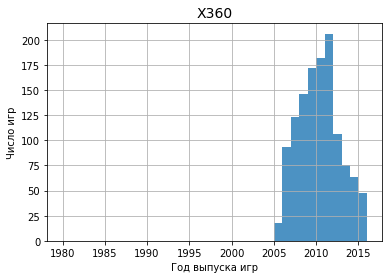

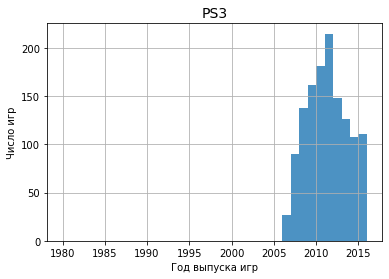

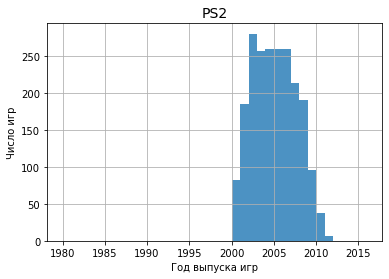

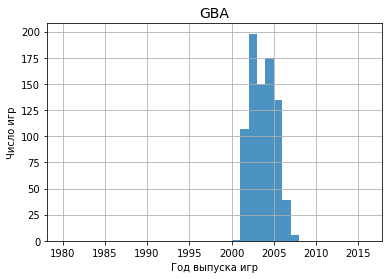

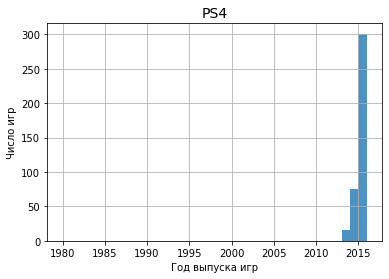

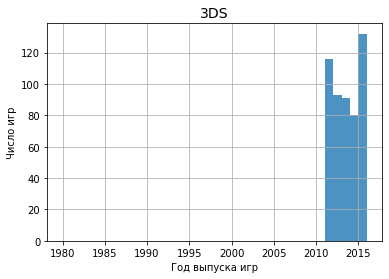

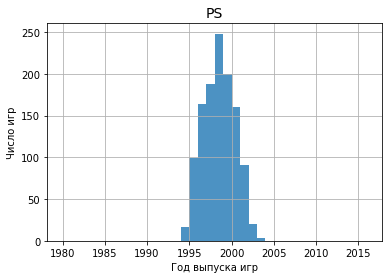

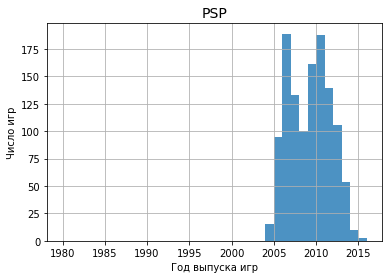

In [24]:
platforms = top_10_platform['platform'].unique()
years_list = []
for i in range(1980, 2017):
    years_list.append(i)
for elem in range(0, len(platforms)):
    top_10_platform[top_10_platform['platform'] == platforms[elem]].plot(kind='hist', bins=years_list, legend=False, grid=True, alpha=0.8)
    plt.title(label=platforms[elem], fontsize=14)
    plt.xlabel('Год выпуска игр')
    plt.ylabel('Число игр')

**Вывод** Из гистограмм видно , что среди топ-10 платформ по объёму продаж игр есть те, пик популярности которых уже прошёл - PS и PS2, GB; есть угасающие - PS3, PSP, Wii и X360; есть набирающие популярность - PS4 (вышла в 2013 году).   

Посмотрим 'срок жизни' платформ из нашей базы - время между выпуском первой и последней игры для них.

### 3.3. 'Время жизни' платформ <a id="lifetime"></a>

In [25]:
# Вычислим разность между годом релиза первой и последней игры для каждой из платформ (в годах)
platform_lifetime = data.pivot_table(index='platform', values='year_of_release', aggfunc=[min, max])
platform_lifetime.columns = ['1st', 'last'] # год релиза первой и последней игры
platform_lifetime['duration'] = platform_lifetime['last'] - platform_lifetime['1st'] # продолжительность 'жизни'
display((platform_lifetime.sort_values('duration', ascending=False)).reset_index()) # отсортуем по убыванию 'срока жизни' платформ и обновим индекс

,platform,1st,last,duration
0,PC,1985,2016,31
1,DS,1985,2013,28
2,GB,1988,2001,13
3,X360,2005,2016,11
4,PSP,2004,2015,11
5,PS2,2000,2011,11
6,NES,1983,1994,11
7,DC,1998,2008,10
8,Wii,2006,2016,10
9,PS3,2006,2016,10


In [26]:
# Посчитаем средний (медианный, чтобы невелировать выбросы) 'срок жизни' платформ
print('Медианный срок жизни платформы', platform_lifetime['duration'].median(), 'лет')

Медианный срок жизни платформы 6.0 лет


**Выводы:**   
1. Медианный срок существоания платформы - 6 лет.    
1. Платформы-долгожители - PC и DS, но,  для DS с 2013 года новые игры не выпускаются.    
1. Ряд платформ 'прожили' один и менее год - эксперементы 1990-х годов. 

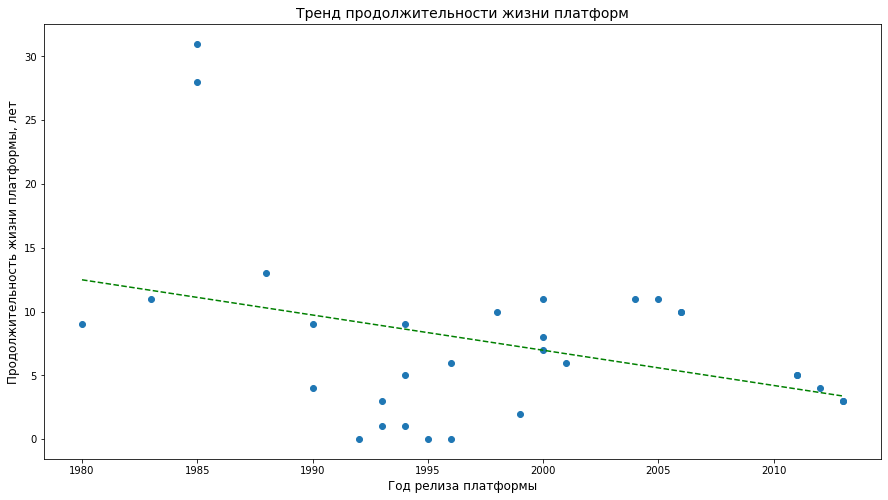

In [27]:
# отсортируем таблицу по годам появления на рынке платформ
platform_lifetime_x = platform_lifetime.sort_values(by='1st')['1st'] # по оси Х год выпуска первой игры
platform_lifetime_y = platform_lifetime.sort_values(by='1st')['duration'] # по оси Y продолжительность жизни платформы
plt.figure(figsize=(15,8))
plt.scatter(platform_lifetime_x, platform_lifetime_y)
# построим линию тренда
z = np.polyfit(platform_lifetime_x, platform_lifetime_y, 1) # аппроксимировать линию тренда будем по минимуму
p = np.poly1d(z)
plt.plot(platform_lifetime_x, p(platform_lifetime_x),'g--') #  линия тренда будет зелёной и пунктирной
# Добавим подписи
plt.title(label='Тренд продолжительности жизни платформ', fontsize=14)
plt.xlabel('Год релиза платформы', fontsize=12)
plt.ylabel('Продолжительность жизни платформы, лет', fontsize=12)
plt.show()

**Вывод** 'Время жизни' платформ со временем снижается и совляет в среднем 6 лет.   
**Гипотеза** скорость обновления - выхода новых -  плаформ увеличивается.      
Посмотрим через какой срок после запуска платформы повлется следующая - её наследница.

In [28]:
# Сздадим новый список куда поместим платформы в порядке возрастания гда релиза первой игры
platform_successor = platform_lifetime.sort_values('1st')
# Значения колоки 1st переведем в список, чтобы можно было двигаться по нему используя индексы элементов
year_1st = list(platform_successor['1st'])
# Создадим пустой список куда будет записываться разность в годах между релизами новых платформ
year_delta = []
# Вычислим разность в цикле
for i in range(0, len(year_1st)-1):
    delta = year_1st[i+1] - year_1st[i]
    year_delta.append(delta)
# Добавим последним значением 0 чтобы можно было присоединить полученные значения к датафрейму platform_lifetime_speedappear
year_delta.append(0)
# Добавим новую колонку, куда запишем разницу между релизами платформ друг за другом 
platform_successor['delta'] = year_delta
display((platform_successor).reset_index()) 

,platform,1st,last,duration,delta
0,2600,1980,1989,9,3
1,NES,1983,1994,11,2
2,DS,1985,2013,28,0
3,PC,1985,2016,31,3
4,GB,1988,2001,13,2
5,SNES,1990,1999,9,0
6,GEN,1990,1994,4,2
7,GG,1992,1992,0,1
8,SCD,1993,1994,1,0
9,NG,1993,1996,3,1


In [29]:
# Посчитаем средний (медианный, чтобы невелировать выбросы) срок выхода новых платформ
print('Медианный срок выхода новых платформ', platform_successor['delta'].median(), 'год')

Медианный срок выхода новых платформ 1.0 год


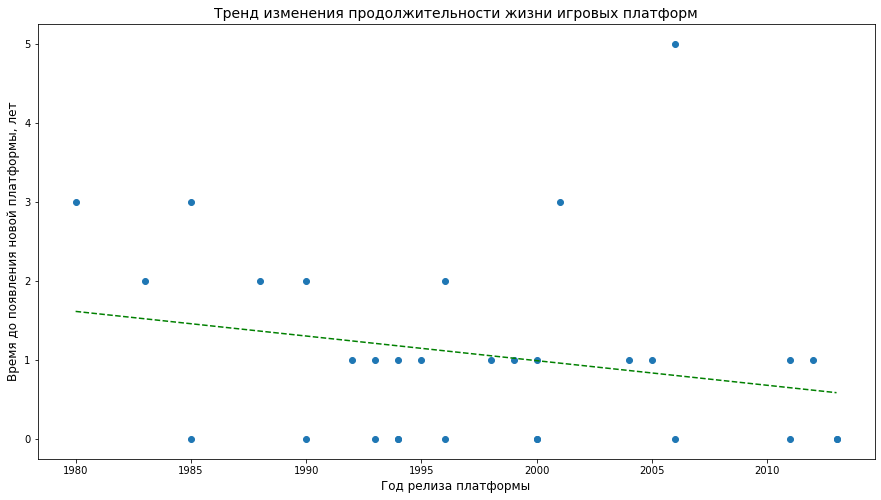

In [30]:
successor_x = platform_successor['1st']
successor_y = platform_successor['delta']
plt.figure(figsize=(15,8))
plt.scatter(successor_x, successor_y)
# Построим линию тренда (почему-то не строится)
z = np.polyfit(successor_x, successor_y, 1) # аппроксимировать линию тренда будем по минимуму
p = np.poly1d(z)
plt.plot(successor_x, p(successor_x), 'g--') #  линия тренда будет зелёной и пунктирной
# Добавим подписи
plt.title(label='Тренд изменения продолжительности жизни игровых платформ', fontsize=14)
plt.xlabel('Год релиза платформы', fontsize=12)
plt.ylabel('Время до появления новой платформы, лет', fontsize=12)
plt.show()

**Вывод** Срок появления новых платформ сокращается и к 2016 году составляет менее 1 года.

---

### 3.4. Определение потенциально прибыльных платформ <a id="relevant"></a>   
Ранее мы определили, что переломным годом для индустрии игр стал 2012 год. Поэтому для анализа возмём период с 2012 по 2016  год.

In [31]:
years = []
for i in range(2012, 2017): # 2017 чтобы вошёл 2016 год
    years.append(i)
relevant = data.query('year_of_release in @years')
display(relevant)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


In [32]:
# Посмотрим суммарные продажи по платформам за анализируемый период
platform_relevant_pivot = (relevant.pivot_table(index=['platform'], aggfunc={'total_sales':sum}).sort_values(by='total_sales', ascending=False))
display((platform_relevant_pivot).reset_index())

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


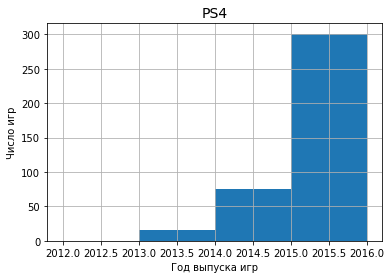

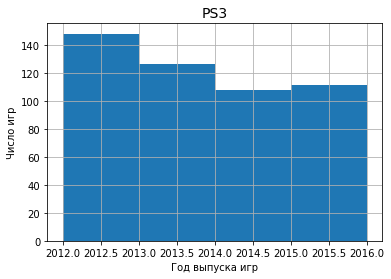

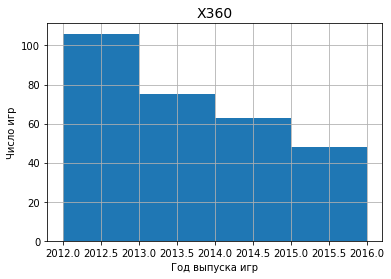

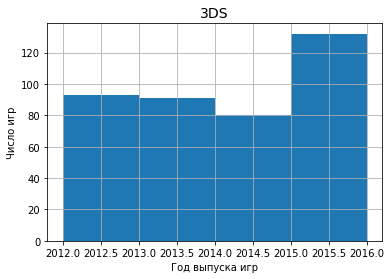

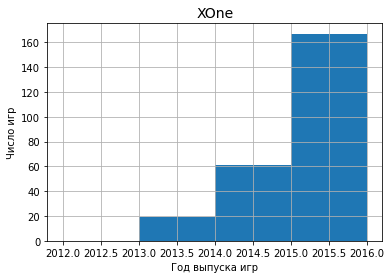

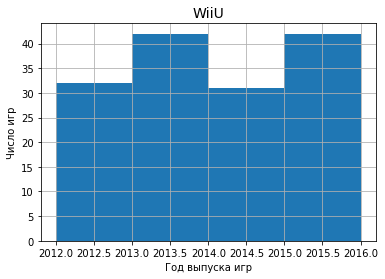

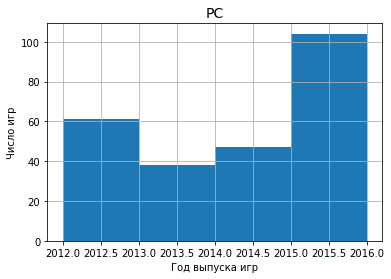

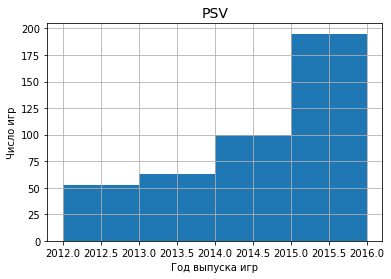

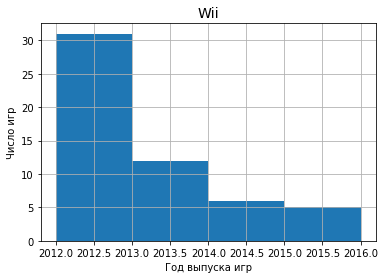

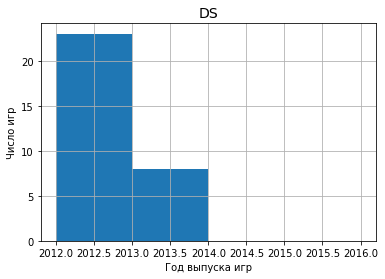

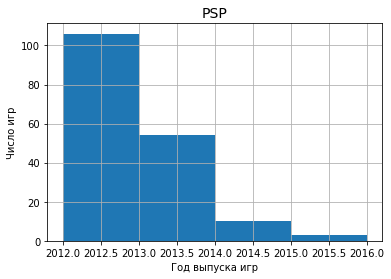

In [33]:
for elem in range(0, len(platform_relevant_pivot.index)):
    relevant[relevant['platform'] == platform_relevant_pivot.index[elem]].plot(kind='hist', bins=years, legend=False, title=platform_relevant_pivot.index[elem], grid=True)
    plt.title(label=platform_relevant_pivot.index[elem], fontsize=14)
    plt.xlabel('Год выпуска игр')
    plt.ylabel('Число игр')

**Вывод**    
В список платформ, на котрых выходили игры после 2011 года, попало 11 платформ, в том числе:   
* Набирающие популярность – PS4, XOne, PSV.    
* Вышедшие на плато продаж – PS3, X360, 3DS, WiiU, PC.    
* С сокращающимися продажами – Wii (спад ещё не критичный, но уже вышла платформа-наследница WiiU), DS (продажи нулевые, поддержка платформы прекращена в 2014 году) и PSP (продажи стремится к нулю).   

Таким образом итоговый список потенциально прибыльных платформ в актуальном периоде включает в себя 8 платформ: PS4, XOne, PSV, PS3, X360, 3DS, WiiU, PC
.        



In [34]:
# Список потенциально прибыльных платформ
promising_platforms = ['PS4', 'XOne', 'PSV', 'PS3', 'X360', '3DS', 'WiiU', 'PC']

### 3.5. Диаграмма размаха по глобальным продажам игр в разбивке по платформам <a id="сhart"></a>




(0.0, 3.0)

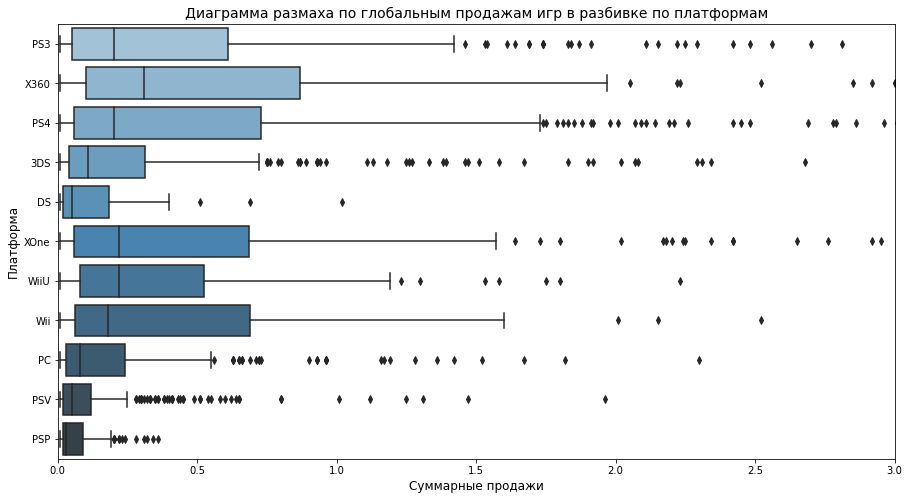

In [35]:
# Используя библиотеку seaborn построим все 'ящики с усами' на одном графике, 
# для сравнения платформ из числа тех, для которых выпусались игры после 2011 года
plt.figure(figsize=(15,8))
sns.boxplot(data=relevant, x='total_sales', y='platform', palette='Blues_d')
plt.title(label='Диаграмма размаха по глобальным продажам игр в разбивке по платформам', fontsize=14)
plt.xlabel('Суммарные продажи', fontsize=12)
plt.ylabel('Платформа', fontsize=12)
plt.xlim(0, 3)

**Вывод** Чем выше средние - тем популярнее платформа. Платформы PS4, X360 и XOne и WiiU - популярны. Wii - тоже популярна, но её продажи, как мы видили ранее, снижаются.

### 3.6. Расчёт корреляции между отзывами и продажами <a id="corr"></a>  
1. Постром диаграммы рассеивания для визуализации коррелиции между отзывами критиков и прдажами, и между отзывами пользователй и продажами игр, для каждой платформы из спика перспективных (promising_platforms).   
1. Подчисчистаем коффициент корреляции между отзывами и продажами.

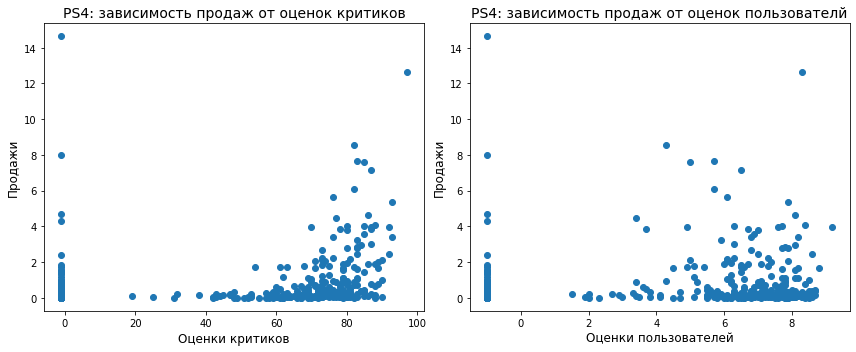

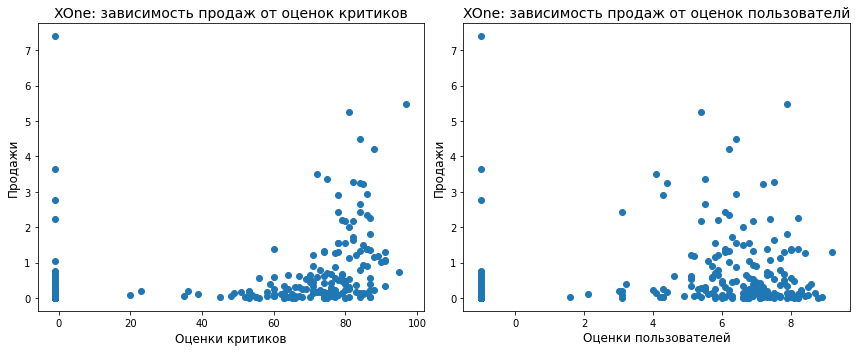

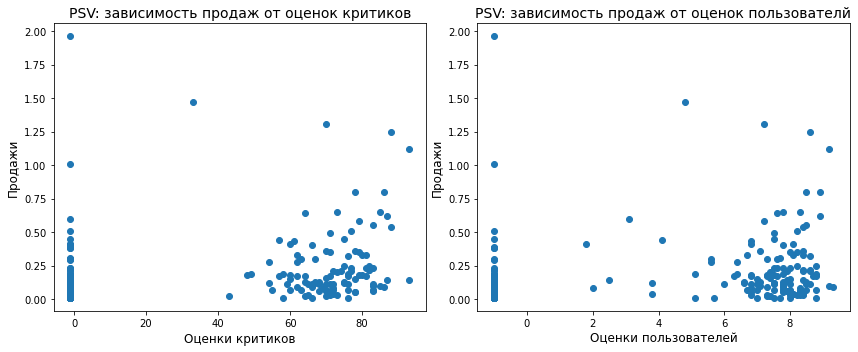

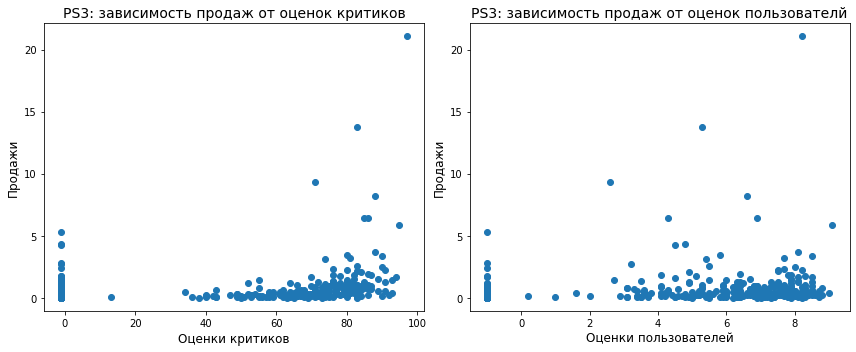

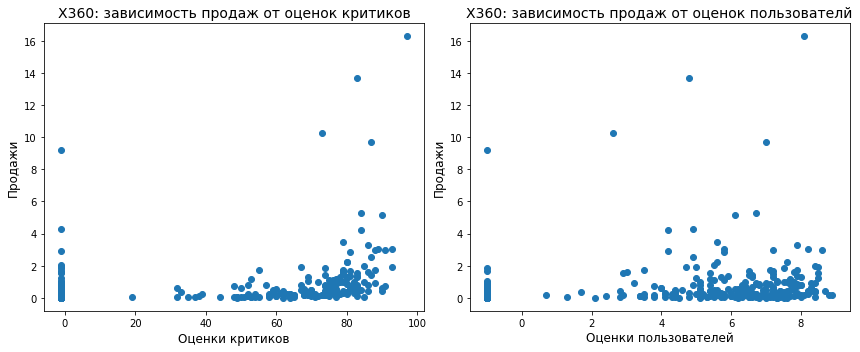

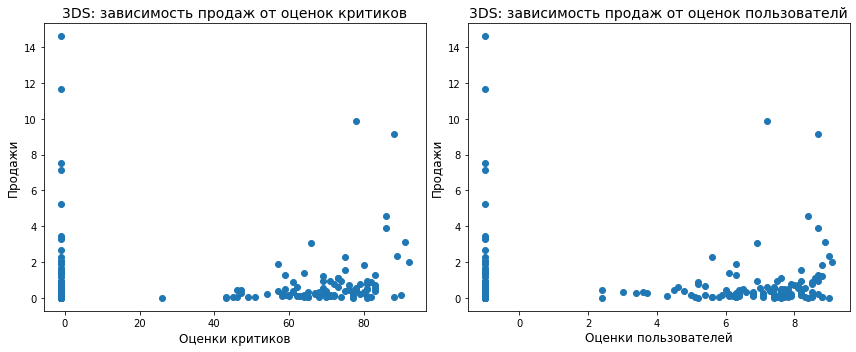

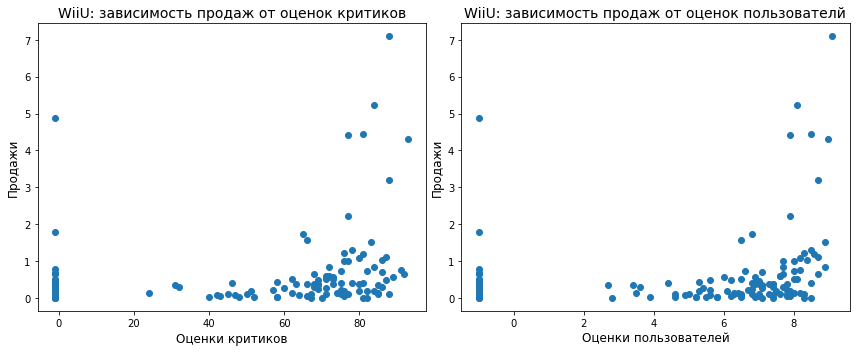

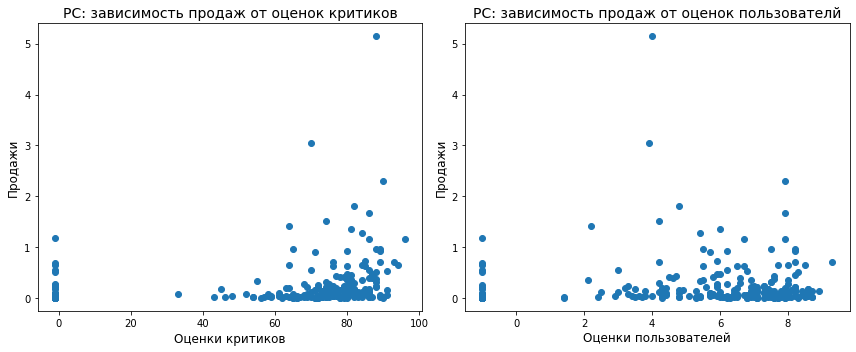

In [36]:
# Используем цикл для построения диаграмм рассеяния
# диаграммы зависимости продаж от оценок критиков и пользователей для одной платформы расположим рядом

for elem in promising_platforms:
    x_critic = relevant[relevant['platform'] == elem]['critic_score']
    y_critic = relevant[relevant['platform'] == elem]['total_sales']
    
    x_user = relevant[relevant['platform'] == elem]['user_score']
    y_user = relevant[relevant['platform'] == elem]['total_sales']
    
    
    fig = plt.figure(figsize=(12, 5))
    
    ax1 = fig.add_subplot(121)
    ax1.scatter(x_critic, y_critic)
    ax1.set_title(elem + ': зависимость продаж от оценок критиков', fontsize=14)
    ax1.set_xlabel('Оценки критиков', fontsize=12)
    ax1.set_ylabel('Продажи', fontsize=12)
    
    ax2 = fig.add_subplot(122)
    ax2.scatter(x_user, y_user)
    ax2.set_title(elem+ ': зависимость продаж от оценок пользователй', fontsize=14)
    ax2.set_xlabel('Оценки пользователей', fontsize=12)
    ax2.set_ylabel('Продажи', fontsize=12)
    
    plt.tight_layout(w_pad=0.5)

In [37]:
# Расчистам кофициенты корреляции по каждой из платформ и запишем их в один дадафрейм
critic_corr = []
user_corr = []
for elem in promising_platforms:
  critic_ratio = relevant[relevant['platform'] == elem]['total_sales'].corr(relevant[relevant['platform'] == elem]['critic_score'])
  critic_corr.append((critic_ratio).round(3))
  user_ratio = relevant[relevant['platform'] == elem]['total_sales'].corr(relevant[relevant['platform'] == elem]['user_score'])
  user_corr.append((user_ratio).round(3))

data = {'Платформа': promising_platforms, 'R критики': critic_corr, 'R пользователи': user_corr}
corr_ratio = pd.DataFrame(data)
print('Коэффициенты корреляции (R)')
display(corr_ratio)                                                    

Коэффициенты корреляции (R)


,Платформа,R критики,R пользователи
0,PS4,0.227,0.116
1,XOne,0.274,0.122
2,PSV,0.395,0.375
3,PS3,0.298,0.217
4,X360,0.261,0.103
5,3DS,0.150,0.128
6,WiiU,0.297,0.259
7,PC,0.204,0.052


**Выводы:**   
1. Объем продаж довольно резко возрастает при оценке критиков от 60 баллов и выше.   
1. Зависимость продаж от оценок пользователей менее выраженная, но продажи начинают расти с оценки в 3 - 4 балла.   
1. Коэффициенты корреляции показывают, что зависимость продаж от оценок критиков сильнее, чем от оценок пользователей. За исключением платформ WiiU и PSV, где коэффициент корреляции примерно на одном уровне.

In [38]:
relevant = relevant.query('critic_score != -1 and user_score != -1')
i = relevant.critic_score.unique()
j = relevant.user_score.unique()
print(i)
print(j)

[97 83 73 78 87 71 88 82 85 74 86 95 76 93 84 81 90 77 80 92 70 72 79 75
 91 66 89 67 57 68 65 55 63 54 61 94 33 64 60 69 59 52 96 53 62 48 50 32
 43 56 34 58 47 46 31 49 40 39 51 36 23 45 42 38 24 19 44 20 25 35 13 37
 26]
[8.2 8.1 5.3 4.8 8.3 2.6 7.2 7.  8.7 4.3 6.6 5.7 5.  6.5 9.1 7.3 6.9 6.1
 7.9 6.7 5.4 4.  8.4 6.4 3.4 8.5 9.  6.2 4.2 6.3 7.7 9.2 4.9 7.6 3.7 4.1
 5.8 5.6 6.8 5.5 7.5 4.4 5.9 8.9 3.9 8.6 7.8 8.  3.1 7.4 6.  7.1 8.8 5.1
 3.5 4.5 2.2 5.2 3.8 9.3 4.6 3.6 3.  4.7 3.2 2.7 2.1 3.3 2.  1.5 2.9 2.5
 2.4 1.9 1.3 1.  1.4 2.3]


In [39]:
# Расчистам кофициенты корреляции по каждой из платформ и запишем их в один дадафрейм
critic_corr = []
user_corr = []
for elem in promising_platforms:
  critic_ratio = relevant[relevant['platform'] == elem]['total_sales'].corr(relevant[relevant['platform'] == elem]['critic_score'])
  critic_corr.append((critic_ratio).round(3))
  user_ratio = relevant[relevant['platform'] == elem]['total_sales'].corr(relevant[relevant['platform'] == elem]['user_score'])
  user_corr.append((user_ratio).round(3))

data = {'Платформа': promising_platforms, 'R критики': critic_corr, 'R пользователи': user_corr}
corr_ratio = pd.DataFrame(data)
print('Коэффициенты корреляции (R)')
display(corr_ratio)   

Коэффициенты корреляции (R)


,Платформа,R критики,R пользователи
0,PS4,0.406,-0.034
1,XOne,0.410,-0.094
2,PSV,0.094,0.014
3,PS3,0.331,0.003
4,X360,0.361,-0.002
5,3DS,0.311,0.202
6,WiiU,0.351,0.392
7,PC,0.236,-0.137


Коэффициенты корреляции (R)


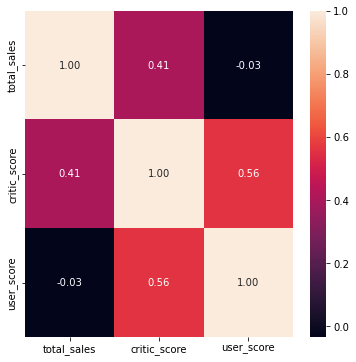

In [40]:
# Постоим матрицу коррелйции
plt.figure(figsize=(6,6))
sns.heatmap(relevant[relevant['platform'] == 'PS4'][['total_sales', 'critic_score', 'user_score']].corr(), annot=True, fmt='.2f')
print('Коэффициенты корреляции (R)')

### 3.7. Распределение игр по жанрам <a id="genre"></a>



Распределение игр по жанрам


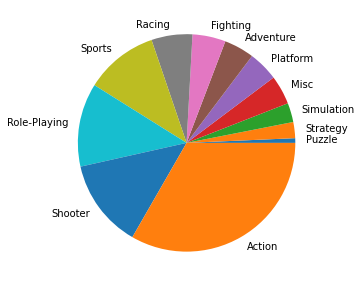

In [41]:
relevant['genre'].value_counts().sort_values(ascending=True).plot(kind='pie', figsize=(5, 5), legend=False)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
print('Распределение игр по жанрам')

**Вывод** Наиболее популярны игры в жанре экшен, ролевые и приключенческие игры. Наименеее популярны  пазлы, стратегии и игры-платформеры.

Распределение продаж по жанрам


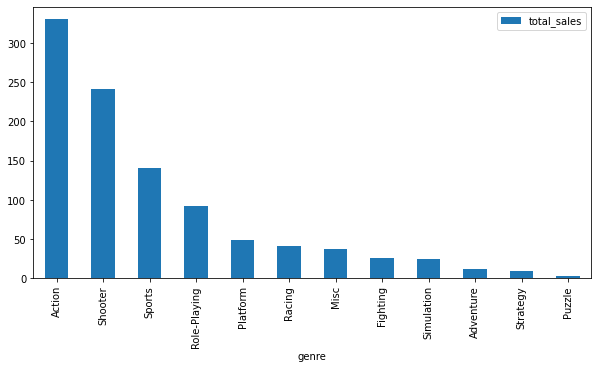

In [42]:
relevant.pivot_table(index='genre', aggfunc={'total_sales':sum}).sort_values(by='total_sales', ascending=False).plot(y='total_sales', kind='bar', figsize=(10, 5))
print('Распределение продаж по жанрам')

**Вывод** Распределение продаж отличается от распределния игр по жанрам. Наиболее продваемыми играми ожидаемо оказались игры в жанке экшен. Но, на втрой позиции - шутеры, замыкают тройку - ролевые игры.   
**Гипотеза** шутеры, спортивные игры приносят болше продаж в пересчёте на одну игру.

In [43]:
# Проверим гипотезу
print('Отношение числа игр к их суммарным продажам')
revenue = relevant.pivot_table(index='genre', aggfunc={'total_sales':sum, 'genre':'count'})
revenue['revenue'] = (revenue['total_sales'] / revenue['genre']).round(2) # Отношение суммарных продаж к числу игр, чем выше - тем лучше
revenue.rename(columns={'genre': 'games_count'}, inplace=True)
display(revenue.sort_values('revenue', ascending=False).reset_index())


Отношение числа игр к их суммарным продажам


,genre,games_count,total_sales,revenue
0,Shooter,171,241.64,1.41
1,Sports,141,140.07,0.99
2,Platform,58,49.39,0.85
3,Action,432,329.84,0.76
4,Misc,56,37.91,0.68
5,Simulation,37,24.75,0.67
6,Role-Playing,161,91.80,0.57
7,Racing,79,41.56,0.53
8,Fighting,64,26.28,0.41
9,Puzzle,9,3.14,0.35


**Выводы:**   
1. Отношение суммарных продаж к числу выпущеннх игр у жанра шутер самое высокое, как мы и подозревали.    
1. Высокий показатель у спортивных симуляторв и платформеров (а их не так много выпускают).   
1. Приключенчикие игры, которых досточно много выпускают, приносят продаж меньше всех. 

---

## 4. Портрет пользователя <a id="users"></a>

Определите для пользователя каждого региона (NA, EU, JP):   
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
* Самые популярные жанры (топ-5). Поясните разницу.   
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?   
  
Где:   
**EU** - Евросоюз   
**NA** - Северная Америка  
**JP** - Япония

### 4.1. Топ-5 платформ <a id="top_platform"></a>

In [44]:
# Для каждого региона посчитаем суммарные продажи по платформам
region_top_platforms = (relevant.pivot_table(index='platform', aggfunc={'eu_sales':sum, 'na_sales':sum, 'jp_sales':sum}))
region_top_platforms.rename(columns={'eu_sales': 'EU', 'na_sales': 'NA', 'jp_sales': 'JP'}, inplace=True)
display((region_top_platforms).reset_index())

,platform,EU,JP,NA
0,3DS,20.01,26.54,28.53
1,DS,0.05,0.37,0.56
2,PC,33.71,0.00,17.72
3,PS3,78.49,20.38,77.11
4,PS4,112.44,9.43,84.46
5,PSP,0.00,0.15,0.00
6,PSV,7.39,7.05,8.52
7,Wii,4.10,1.09,7.03
8,WiiU,20.42,10.17,30.69
9,X360,57.15,1.38,106.99


Топ-5 платформ по регионам


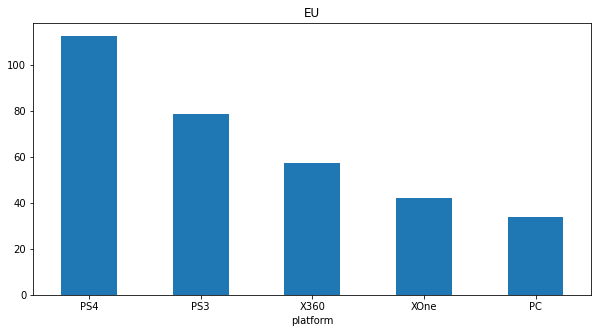

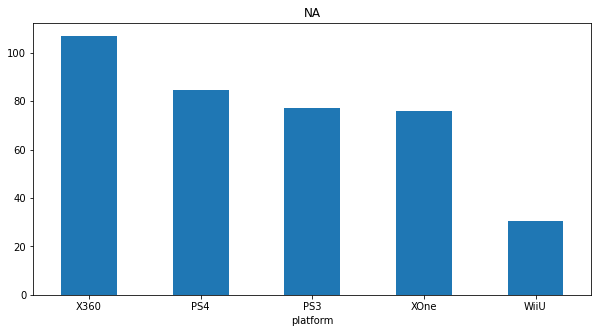

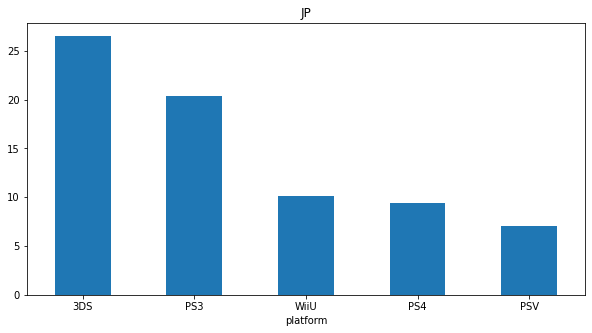

In [45]:
# Построим графики распределения продаж по платформам и оставим топ-5 платформ по популярности в каждом из регионов
regions = ['EU', 'NA', 'JP']
for elem in range(0, 3):
    (region_top_platforms.nlargest(5, columns=regions[elem]).plot(y=regions[elem], kind='bar', figsize=(10, 5), legend=False, title=regions[elem]))
    plt.xticks(rotation = 0)
print('Топ-5 платформ по регионам')

**Выводы:**    
1. В Европе самая популярная платформа - PS4, в Северной Америке - X360, в Японии - 3DS.   
1. Популярность X360 в Сверной Америке и 3DS в Японии можно обяснить тем что это местные производители для жителей этих стран: X360 выпускает Microsoft (США), а 3DS - Nintendo (Япония). Жители этих стран являются целевой аудиторией производителей данных консолей и на них направлена реклама производителей.   
1. В Европе собственного производителя конслей нет, а популярность  PS4 опят же можно обяснить грамотным маркетингом компании Sony (Япония) на еропейском рынке.



### 4.2. Топ-5 жанров <a id="top_genre"></a>

In [46]:
# Для каждого региона посчитаем суммарные продажи по жанрам
region_top_genre = (relevant.pivot_table(index='genre', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum}))
region_top_genre.rename(columns={'eu_sales': 'EU', 'na_sales': 'NA', 'jp_sales': 'JP'}, inplace=True)
display((region_top_genre).reset_index())

,genre,EU,JP,NA
0,Action,127.81,20.92,139.84
1,Adventure,5.16,1.06,3.99
2,Fighting,7.25,3.98,12.01
3,Misc,11.03,4.78,18.89
4,Platform,16.62,7.96,20.39
5,Puzzle,1.14,0.81,1.00
6,Racing,20.84,2.13,13.87
7,Role-Playing,28.34,17.52,36.76
8,Shooter,89.26,7.62,115.75
9,Simulation,10.17,7.29,5.70


Топ-5 жанров по регионам


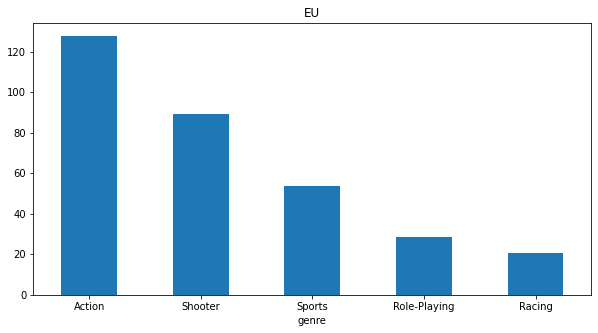

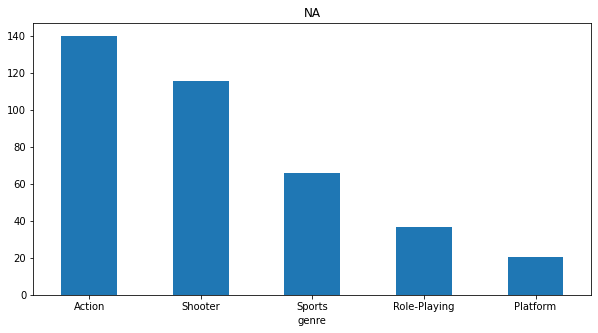

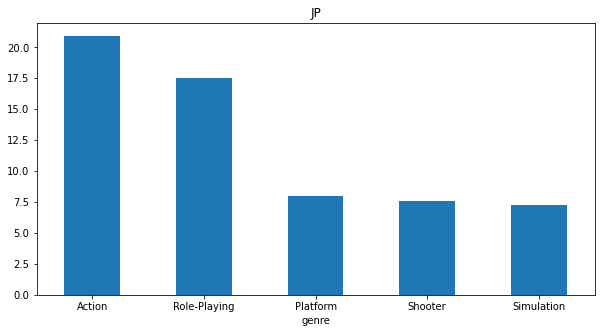

In [47]:
# Построим графики распределения продаж по жанрам и оставим топ-5 жанров по популярности в каждом из регионов
for elem in range(0, 3):
    (region_top_genre.nlargest(5, columns=regions[elem]).plot(y=regions[elem], kind='bar', figsize=(10, 5), legend=False, title=regions[elem]))
    plt.xticks(rotation = 0)
print('Топ-5 жанров по регионам')

**Выводы:**    
1. В Европе и Северной Америке популярны игры в жанре экшен, в Японии - ролеывые игры.   
1. Жанр экшен в Европе и Северной Америке можно обьяснить тем фактом, что это самый популярный жанр игр в целом (как мы установили ранее).     
1. Популярность ролевых игр в  Японии обясняется их культурой и сложившимся традициями. Подробнее https://vc.ru/finance/192302-osnovnye-cherty-yaponskogo-geymdeva-i-osobennosti-yaponskoy-kultury-povliyavshie-na-nego

### 4.3. Влияние рейтинга ESRB на продажи в регионах <a id="esrb"></a>

**Расшифровка рейтингов**   
«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.  
«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены.    
«T» («Teen») — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.    
«M» («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.   
Источник: http://www.gamer.ru/everything/reytingi-esrb-ot-a-do-ya

In [48]:
# Для каждого региона посчитаем суммарные продажи игр с разным ретингом
region_rating = (relevant.pivot_table(index='rating', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum}))
region_rating.rename(columns={'eu_sales': 'EU', 'na_sales': 'NA', 'jp_sales': 'JP'}, inplace=True)
display((region_rating).reset_index())

,rating,EU,JP,NA
0,E,97.44,26.79,99.19
1,E10+,41.46,7.95,58.40
2,M,183.82,20.02,217.67
3,T,49.86,21.86,61.32
4,unknown,3.41,0.23,1.06


Колонка rating содержит значение unknown - так мы заменяли пропущенне значения.

Продажи игр с разным ретингом по регионам


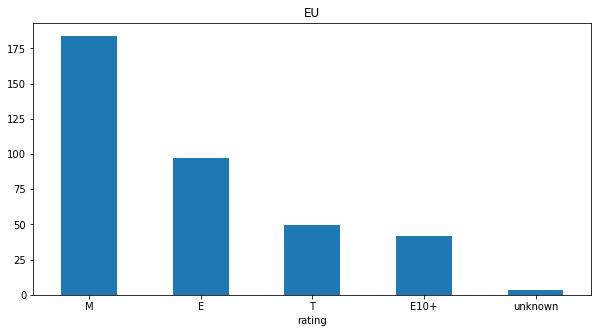

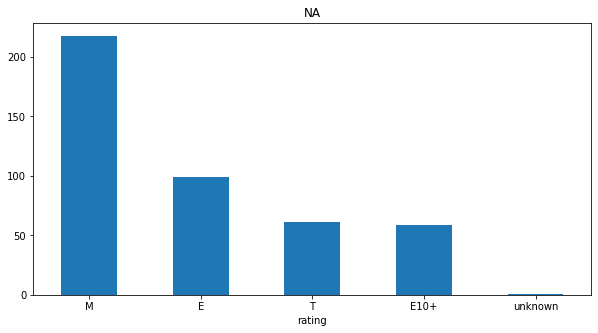

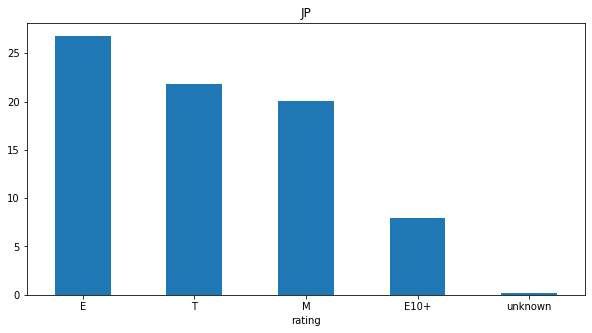

In [49]:
# Построим графики распределения продаж по ретингам игр в каждом из регионов
for elem in range(0, 3):
    (region_rating.nlargest(5, columns=regions[elem]).plot(y=regions[elem], kind='bar', figsize=(10, 5), legend=False, title=regions[elem]))
    plt.xticks(rotation = 0)
print('Продажи игр с разным ретингом по регионам')

**Выводы:**    
1. В Европе и Северной Америке снова схожие вкусы: популярны игры с ретингом «M» («Mature») — «От 17 лет», что можно объяснить культурыми особенностями (общество либерально) и «E» («Everyone») — «Для всех».   
1. В Японии популярны игры с ретингом «E» («Everyone») — «Для всех» и «T» («Teen») — «Подросткам 13—19 лет» - видимо основная уадитори игр это дети и подростки + культурные особенности описанные в статье с vc.ru - вкусы отличеются от западных.

## 5. Проверка гипотез <a id="hypothesis_testing"></a>   
**Гипотезы:**   
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;   
1. Средние пользовательские рейтинги жанров Action и Sports разные.

### 5.1. Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <a id="hypothesis_1"></a>

Сформулируем нулевую и альтернативную гипотезы:   
   
H0 - средние пользовательские рейтинги платформ Xbox One и PC равны.   
H1 - средний пользовательский рейтинг платформы Xbox One отличается от среднего пользовательского рейтинга платформы PC.    Альтернативная гипотеза у нас двусторонняя, т.к. средний рейтинг может отличаться от как в большую так и в меньшую сторону.   

In [50]:
#Чтобы проверить гипотезу о равенстве средних двух выборок применим метод scipy.stats.ttest_ind
# 1. удалим из выборки отрицательные значения, которыми ранее заменили пропуски чтобы они не влияли на распределения
xbox_one_ttest = relevant[(relevant['platform']=='XOne')&(relevant['user_score'] >= 0)]['user_score']
pc_ttest = relevant[(relevant['platform']=='PC')&(relevant['user_score'] >= 0)]['user_score']
# 2. проверим дисперсии рассматриваемых выборок
xbox_one_ttest_var = np.var(xbox_one_ttest, ddof=1)
pc_ttest_var = np.var(pc_ttest, ddof=1)

print('Дисперсия платформы Xbox One:', xbox_one_ttest_var)
print('Дисперсия платформы PC:', pc_ttest_var)
print('Разница между дисперсиями платформ:', pc_ttest_var - xbox_one_ttest_var)

Дисперсия платформы Xbox One: 1.7963991130820411
Дисперсия платформы PC: 2.687800165751582
Разница между дисперсиями платформ: 0.8914010526695408


**NB!** Разница между дисперсиями выборок составляет 0,86, что при данном уровне дисперсии довольно большая разница и считать дисперсии выборок равными нельзя, поэтому зададим аргумент equal_var=False.

In [51]:
alpha = 0.05 # Уровень значимости зададим равным 5%
results = st.ttest_ind(xbox_one_ttest, pc_ttest, equal_var=False)
print('p-значение:', (results.pvalue).round(2))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.59
Не получилось отвергнуть нулевую гипотезу


**Вывод** P-value составляет 55%, что значительно больше 5%, таким образом мы можем сделать вывод о том, что *средний рейтинг платформ Xbox One и PC статистически значимо не отличается*.

### 5.2. Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные <a id="hypothesis_2"></a>

Сформулируем нулевую и альтернативную гипотезы:   

H0 - средние пользовательские рейтинги жанров Action и Sports равны.    
H1 -  средние пользовательские рейтинги жанров Action и Sports различаются. Приэтом нам не важно больше он или меньше.   

In [52]:
#Чтобы проверить гипотезу о равенстве средних двух выборок применим метод scipy.stats.ttest_ind
# 1. удалим из выборки отрицательные значения, которыми ранее заменили пропуски чтобы они не влияли на распределения
action_ttest = relevant[(relevant['genre']=='Action')&(relevant['user_score'] >= 0)]['user_score']
sports_ttest = relevant[(relevant['genre']=='Sports')&(relevant['user_score'] >= 0)]['user_score']
# 2. проверим дисперсии рассматриваемых выборок
action_ttest_var = np.var(action_ttest, ddof=1)
sports_ttest_var = np.var(sports_ttest, ddof=1)

print('Дисперсия жанра Action:', action_ttest_var)
print('Дисперсия жанра Sports:', sports_ttest_var)
print('Разница между дисперсиями платформ:', sports_ttest_var - action_ttest_var)

Дисперсия жанра Action: 1.7516700502706886
Дисперсия жанра Sports: 1.985888551165147
Разница между дисперсиями платформ: 0.2342185008944584


**NB!** Разница между дисперсиями выборок составляет 0,86, что при данном уровне дисперсии довольно большая разница и считать дисперсии выборок равными нельзя, поэтому зададим аргумент equal_var=False.

In [53]:
alpha = 0.05 # Уровень значимости зададим равным 5%
results = st.ttest_ind(action_ttest, sports_ttest, equal_var=False)
print('p-значение:', (results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.858072645452818e-14
Отвергаем нулевую гипотезу


**Вывод** Значение P-value составлет малые доли процента, что значительно меньше 5%, таким образом мы можем сделать вывод о том, что *средние пользовательские рейтинги жанров Action и Sports статистически значимо различаются.*

## 6. Общий вывод <a id="summary"></a>

1. Выпуск игра резко пошел в верх в 1993 году (вышел первый Doom) и в 2008-2009 году достиг пика (годы финансового кризиса), после чего последовал спад выпуска игр, длившийся до 2013 года (наверное, последствия рецессии экономики США после 2008 года). Был спад выпуска в 1999-2000 годах - возможно т.к. лопнул 'пузырь доткомов'. В последующие годы количество выпускаемых ежегодно игр так и не достигло пиковых значений.     
1. Среди топ-10 платформ по объёму продаж игр есть те, пик популярности которых уже прошёл - PS и PS2, GB; есть угасающие - PS3, PSP, Wii и X360; есть набирающие популярность - PS4 (вышла в 2013 году).     
1. Медианный срок существования платформы - 6 лет. Платформы-долгожители - PC и DS, но, для DS с 2013 года новые игры не выпускаются.    
1. Срок появления новых платформ сокращается и к 2016 году составляет менее 1 года.    
1. В список платформ, на которых выходили игры после 2011 года, попало 11 платформ, в том числе:   
 * Набирающие популярность – PS4, XOne, PSV.    
 * Вышедшие на плато продаж – PS3, X360, 3DS, WiiU, PC.    
 * С сокращающимися продажами – Wii (спад ещё не критичный, но уже вышла платформа-наследница WiiU), DS (продажи нулевые, поддержка платформы прекращена в 2014 году) и PSP (продажи стремится к нулю).    
1. Объем продаж довольно резко возрастает при оценке критиков от 60 баллов и выше. Зависимость продаж от оценок пользователей менее выраженная, но продажи начинают расти с оценки в 3 - 4 балла. Таким образом - зависимость продаж от оценок критиков сильнее, чем от оценок пользователей.    
1. Наиболее популярны (по числу выпущенных игр) игры в жанре экшен, ролевые и приключенческие игры. Наименее популярны пазлы, стратегии и игры-платформеры. Но, распределение продаж отличается от распределения игр по жанрам. Наиболее продаваемыми играми ожидаемо оказались игры в жанре экшен. Но, на второй позиции - шутеры, замыкают тройку - ролевые игры. Из этого следует, что:   
 * Отношение суммарных продаж к числу выпущенных игр у жанра шутер самое высокое.    
 * Высокий показатель у спортивных симуляторов и платформеров (а их не так много выпускают).   
 * Приключенческие игры, которых досочно много выпускают, приносят продаж меньше всех.   
1. В Европе самая популярная платформа - PS4, в Северной Америке - X360, в Японии - 3DS. Популярность X360 в Северной Америке и 3DS в Японии можно объяснить тем что это местные производители для жителей этих стран: X360 выпускает Microsoft (США), а 3DS - Nintendo (Япония). Жители этих стран являются целевой аудиторией производителей данных консолей и на них направлена реклама производителей. В Европе собственного производителя консолей нет, а популярность PS4 опят же можно объяснить грамотным маркетингом компании Sony (Япония) на европейском рынке.    
1. В Европе и Северной Америке популярны игры в жанре экшен, в Японии - ролевые игры. Жанр экшен в Европе и Северной Америке можно обьяснить тем фактом, что это самый популярный жанр игр в целом (как мы установили ранее). Популярность ролевых игр в Японии объясняется их культурой и сложившимся традициями.   
1. В Европе и Северной Америке снова схожие вкусы: популярны игры с рейтингом «M» («Mature») — «От 17 лет», что можно объяснить культурными особенностями (общество либерально) и «E» («Everyone») — «Для всех». В Японии популярны игры с рейтингом «E» («Everyone») — «Для всех» и «T» («Teen») — «Подросткам 13—19 лет» - видимо основная аудитория игр это дети и подростки плюс вкусы отличаются от западных.   
1. Средний рейтинг платформ Xbox One и PC статистически значимо не отличается.    
1. Средние пользовательские рейтинги жанров экшен и спортивные симуляторы статистически значимо различаются.    


In [54]:
# И в конце пасхалка, как в компьтерной игре
# Раскомметируй и запусти код ниже
# from IPython.display import Image
# display(Image(url='https://i.gifer.com/5UKF.gif', width = 200))